<a href="https://colab.research.google.com/github/palomaavena/on35-python-s12-pandas-numpy-II/blob/main/Exercicio_S12_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte 1: Preparação do Ambiente
Instalação das bibliotecas necessárias:

Certifique-se de ter as bibliotecas necessárias instaladas. Se necessário, instale usando pip.

Geração de Dados Fictícios:

Use o script abaixo para gerar um conjunto de dados falso que simula informações de vendas de produtos em uma loja:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurando a seed para reprodutibilidade
np.random.seed(42)

# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

# Criando DataFrame
data = {
    'Data': np.random.choice(datas, num_registros),
    'Categoria': np.random.choice(categorias, num_registros),
    'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
    'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
}
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


Parte 2: Consulta e Filtragem de Dados
Carregar os dados:

In [ ]:
df = pd.read_csv('dados_vendas.csv')

Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?

In [ ]:
df.shape    # info tras colunas

(365, 5)

Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?

In [ ]:
df.dtypes

,0
Data,object
Categoria,object
Quantidade_Vendida,int64
Preco_Unitario,float64
Valor_Total,float64


Exibir as primeiras 5 linhas do DataFrame:

In [ ]:
print(df.head())

         Data  Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0  2023-04-13     Roupas                  74           60.43      4471.82
1  2023-12-15  Alimentos                  83          272.88     22649.04
2  2023-09-28     Roupas                  17          195.62      3325.54
3  2023-04-17     Roupas                  85          233.93     19884.05
4  2023-03-13     Roupas                  78          305.94     23863.32


Pergunta 3: Quantas categorias únicas de produtos estão presentes no DataFrame? 5

In [ ]:
#categorias = pd.unique(df['Categoria']) ou
pd.unique(df['Categoria'])
print(len(categorias))
print(categorias)                     # para trazer os nomes só tirar o len

5
['Roupas' 'Alimentos' 'Eletrônicos' 'Brinquedos' 'Livros']


Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':

In [ ]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
print(eletronicos)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
5    2023-07-08  Eletrônicos                  73          256.12     18696.76
6    2023-01-21  Eletrônicos                   1          274.53       274.53
7    2023-04-13  Eletrônicos                  51          248.32     12664.32
14   2023-06-01  Eletrônicos                  34          303.52     10319.68
18   2023-09-15  Eletrônicos                  39          121.40      4734.60
..          ...          ...                 ...             ...          ...
347  2023-09-10  Eletrônicos                  33          431.46     14238.18
349  2023-09-13  Eletrônicos                  27          201.67      5445.09
351  2023-05-08  Eletrônicos                  29          243.57      7063.53
353  2023-10-08  Eletrônicos                  57          427.57     24371.49
356  2023-02-27  Eletrônicos                  55          466.48     25656.40

[73 rows x 5 columns]


 Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?  12291.256301

In [ ]:
agrupado = df.groupby('Categoria')['Valor_Total'].mean().reset_index()    # o .reset_index() pode ser tirado mas ai aparece as info Name: Valor_Total, dtype: float64
print(agrupado)


Categoria
Alimentos      13499.231636
Brinquedos     13347.910562
Eletrônicos    12291.256301
Livros         13201.170685
Roupas         13216.203867
Name: Valor_Total, dtype: float64


Filtrar as vendas acima de R$ 1000:

In [ ]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
print(vendas_acima_1000)
print(len(vendas_acima_1000))   # ou print(vendas_acima_1000.count())    ou shape

           Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0    2023-04-13      Roupas                  74           60.43      4471.82
1    2023-12-15   Alimentos                  83          272.88     22649.04
2    2023-09-28      Roupas                  17          195.62      3325.54
3    2023-04-17      Roupas                  85          233.93     19884.05
4    2023-03-13      Roupas                  78          305.94     23863.32
..          ...         ...                 ...             ...          ...
358  2023-12-26  Brinquedos                  68          147.88     10055.84
359  2023-06-23   Alimentos                  86          133.80     11506.80
361  2023-04-24  Brinquedos                  10          350.90      3509.00
363  2023-12-08  Brinquedos                  74          270.98     20052.52
364  2023-05-31      Roupas                  97          481.44     46699.68

[330 rows x 5 columns]
330


Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram? 330

Parte 3: Agrupamento e Agregação
Agrupar os dados por categoria e calcular o total de vendas por categoria:

In [ ]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
print(total_por_categoria)

     Categoria  Valor_Total
0    Alimentos    742457.74
1   Brinquedos   1187964.04
2  Eletrônicos    897261.71
3       Livros    963685.46
4       Roupas    991215.29


Pergunta 6: Qual categoria teve o maior valor total de vendas?  Eletrônicos

Calcular a quantidade média vendida por categoria:

In [ ]:
media_quantidade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
print(media_quantidade_categoria)

     Categoria  Quantidade_Vendida
0    Alimentos           55.618182
1   Brinquedos           47.247191
2  Eletrônicos           46.780822
3       Livros           50.917808
4       Roupas           47.200000


Pergunta 7: Qual categoria teve a maior quantidade média vendida? Alimentos

Parte 4: Visualização de Dados
Criar um gráfico de barras mostrando o total de vendas por categoria:

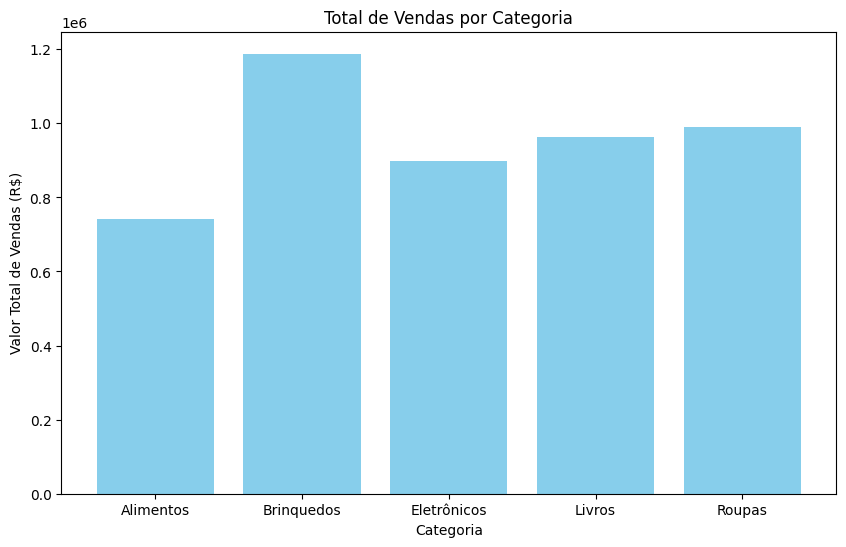

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais? Brinquedos

Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':

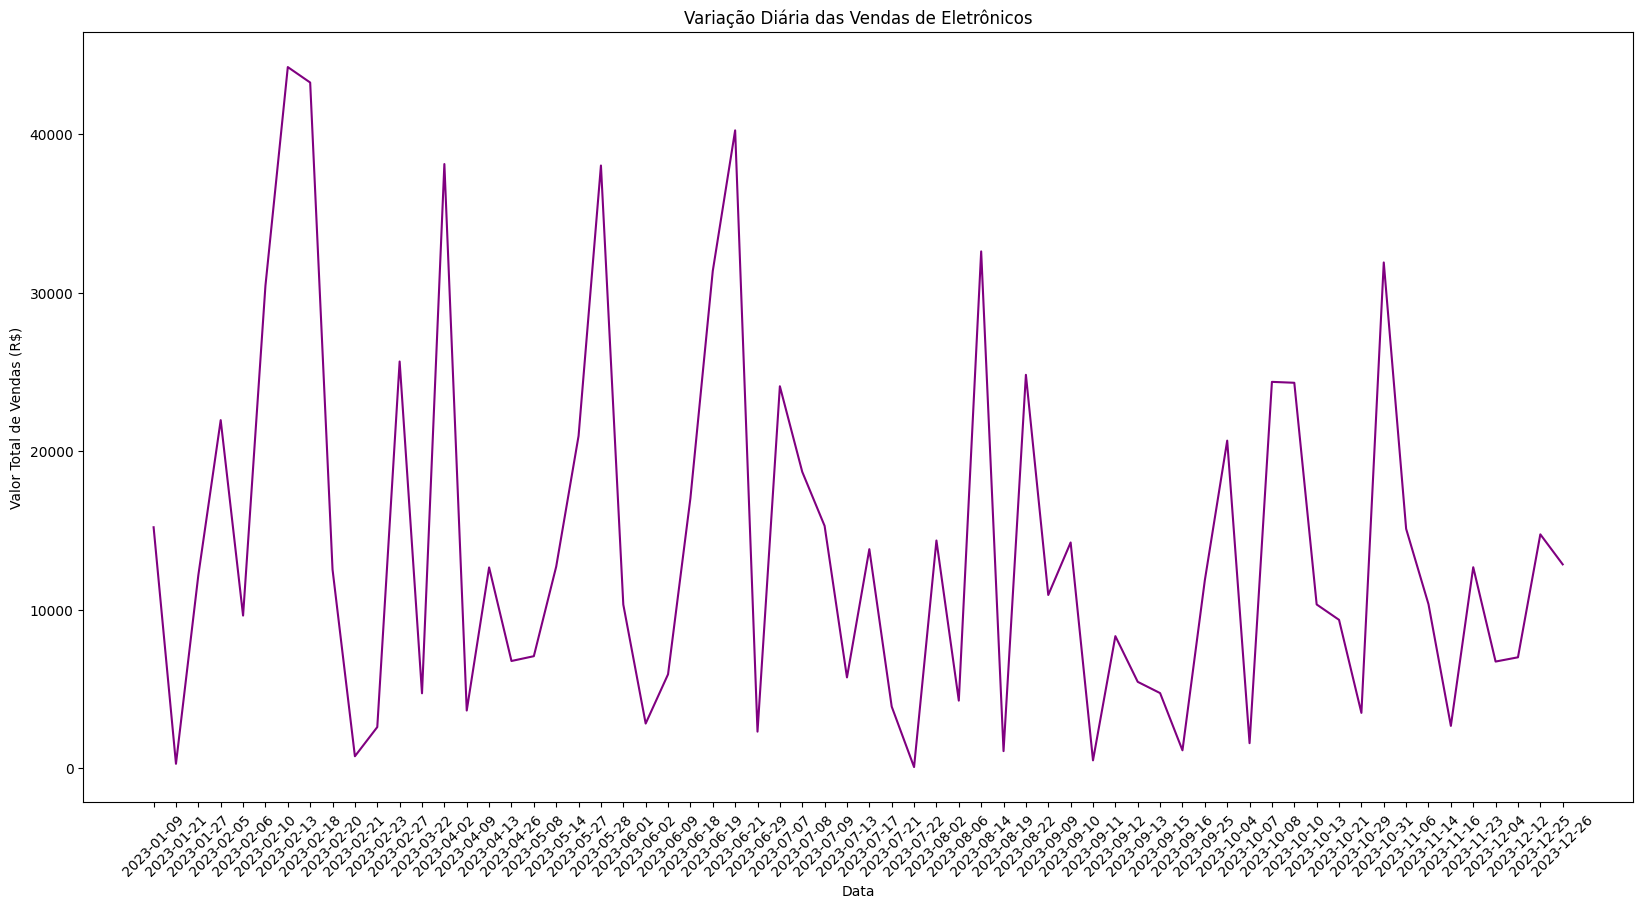

In [ ]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(20, 10))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos? Maiores picos estão em datas como início e fim do mês, a exceção de junho.